In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## Obtaning the df. about 

In [3]:
df_suicide = pd.read_csv('data/master.csv')

In [4]:
df_suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
df_suicide.sample()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
9502,Georgia,1995,female,15-24 years,4.0,366950,1.09,Georgia1995,NaN,"2,69,37,31,866",611.0,Generation X


In [6]:
df_suicide.drop(axis=1, columns=['suicides/100k pop', 'country-year', 'HDI for year',' gdp_for_year ($) ', 'gdp_per_capita ($)'], inplace = True)

In [7]:
df_suicide.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [8]:
df_suicide_uk=df_suicide[df_suicide.country =='United Kingdom']


In [9]:
df_suicide_uk.age.unique()


array(['75+ years', '55-74 years', '35-54 years', '25-34 years',
       '15-24 years', '5-14 years'], dtype=object)

In [10]:
df_suicide_uk = df_suicide_uk[df_suicide_uk.year>2004]
df_suicide_uk

,country,year,sex,age,suicides_no,population,generation
26716,United Kingdom,2005,male,35-54 years,1359.0,8397155,Boomers
26717,United Kingdom,2005,male,25-34 years,563.0,3951996,Generation X
26718,United Kingdom,2005,male,75+ years,215.0,1749520,Silent
26719,United Kingdom,2005,male,55-74 years,617.0,5831367,Silent
26720,United Kingdom,2005,male,15-24 years,296.0,4029567,Millenials
...,...,...,...,...,...,...,...
31424,United Kingdom,2017,female,55-74 years,267.0,66058859,G.I. Generation
31506,United Kingdom,2020,female,75+ years,NaN,67081000,G.I. Generation
31588,United Kingdom,2019,female,75+ years,85.0,66836327,G.I. Generation
31670,United Kingdom,2018,female,75+ years,93.0,66460344,G.I. Generation


## Obtaining via web scraping the releases Love Island until 2020


In [11]:
url='https://thetvdb.com/series/love-island/allseasons/official'

In [12]:
soup = BeautifulSoup(requests.get(url).content, "html.parser")

In [13]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Love Island - Aired Order - All Seasons - TheTVDB.com</title>
<meta content="oMjySwKCQlwpEIa3ZRqVX3u9Cf3iEDejgQVmNUUC" name="csrf-token"/>
<link href="/images/icon.png" rel="icon" type="image/png"/>
<link href="/apple-touch-icon.png" rel="apple-touch-icon">
<link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/apple-touch-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/apple-touch-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
<link href="/apple-touch-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/apple-touch-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="/apple-touch-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/>
<link href="/apple-touch-icon-152x152.png" rel="apple

In [14]:
love_island_date = soup.find_all("ul", attrs={'class':'list-inline text-muted'})

In [15]:
lst_date=[ i.getText().replace(',', '').replace('\n', ' ').split() for i in love_island_date]

In [16]:
for i in lst_date:
    i.pop()

In [17]:
lst_date[2]

['June', '9', '2015']

In [18]:
year =[i[2] for i in lst_date]

In [19]:
month =[i[0] for i in lst_date]

In [20]:
love_island_episode= soup.find_all("span", attrs={'class':'text-muted'})

In [21]:
season_episode = [i.getText().split('E') for i in love_island_episode]

In [22]:
lst_episodes=[i[1] for i in season_episode]
lst_seasons=[i[0].replace('S','') for i in season_episode]

In [23]:
love_island_dict={
    'Season': lst_seasons,
    'Episode': lst_episodes,
    "Year": year,
    "Month": month
}

In [24]:
df_loveisland = pd.DataFrame.from_dict(love_island_dict)
df_loveisland.Year= df_loveisland.Year.astype("int")
df_loveisland.Season= df_loveisland.Season.astype("int")
df_loveisland.Episode= df_loveisland.Episode.astype("int")
df_loveisland_until_2020 = df_loveisland[df_loveisland.Year <2020]

In [25]:
df_loveisland_until_2020.sample()

,Season,Episode,Year,Month
27,1,28,2015,July


## Analysis

In [26]:
df_suicide_uk.year.unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2020, 2019, 2018, 2017])

In [27]:
df_loveisland_until_2020.sample()

,Season,Episode,Year,Month
133,4,5,2018,June


In [28]:
df_suicide_uk.sample()

,country,year,sex,age,suicides_no,population,generation
26844,United Kingdom,2015,female,75+ years,108.0,3070457,Silent


In [29]:
df_suicide_uk = df_suicide_uk[df_suicide_uk['suicides_no'].notna()]

In [30]:
df_suicide_ages=df_suicide_uk[['year','age','generation','suicides_no']].groupby(by=['age', 'year']).agg({"suicides_no":"sum"})

In [31]:
df_suicide_ages

suicides_no
age         year             
15-24 years 2005        384.0
            2006        382.0
            2007        379.0
            2008        404.0
            2009        416.0
...                       ...
75+ years   2014        340.0
            2015        381.0
            2017        338.0
            2018        413.0
            2019        372.0

[84 rows x 1 columns]

In [32]:
df_distr_epi=df_loveisland_until_2020[['Year','Month','Season','Episode']].groupby(by=['Season','Year']).agg({'Episode':'count'})
df_distr_epi

,,Episode
Season,Year,
1,2015,34
2,2016,44
3,2017,51
4,2018,58
5,2019,58


## Figures for suicide

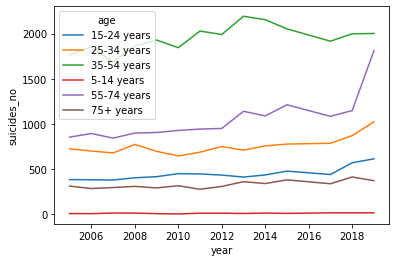

In [33]:
suicide_ages = sns.lineplot(data=df_suicide_ages, x="year", y="suicides_no", hue="age");



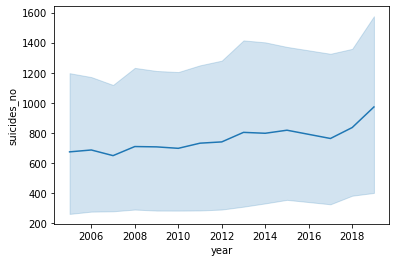

In [34]:
suicide_evol = sns.lineplot(data=df_suicide_ages, x="year", y="suicides_no")

## Figures for Love island

In [36]:
fig = px.histogram(df_loveisland_until_2020, x="Year",color="Season")
fig.show()